In [1]:
from baf2sql2unidec import *
import matplotlib.pyplot as plt
import os
import unidec
from unidec.metaunidec.mudeng import MetaUniDec
from unidec import tools as ud
import pandas as pd

In [2]:
def match(pks, masslist, names, tolerance):
    matches = []
    errors = []
    peaks = []
    nameslist = []

    for p in pks:

        target = p.mass
    #     print(target)
        nearpt = ud.nearestunsorted(masslist, target)

        match = masslist[nearpt]
        error = target-match
        if np.abs(error) < tolerance: 
            name = names[nearpt]
            p.error = error
        else:
            name = ""
        p.label = name
        p.match = match
        p.matcherror = error

        matches.append(match)
        errors.append(error)
        peaks.append(target)
        nameslist.append(name)
        
    matchlist = [peaks, matches, errors, nameslist]
    return matchlist 

### Updates:
- Now runs through pip installed unidec 
- Improved matching algorithm
- Added upload from .d files using baf2sql (much faster than mzML)


In [3]:
# path = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing\\20230710 4C_24h_1.d"
# directory = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h"
directory = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing"

scans = [434, 481]
# scans = [444, 500]
scans = [388, 475]

masslist = [13597.42, 13151.97, 12559.36]
names = ["CTB-H6", "CTB-LPETGVSEYG", "CTB-LPET"]
tolerance = 10

Specified BAF has 738 spectra with line and profile data.


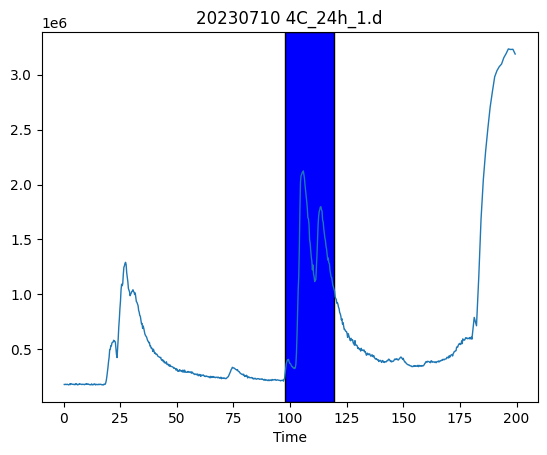

Specified BAF has 738 spectra with line and profile data.


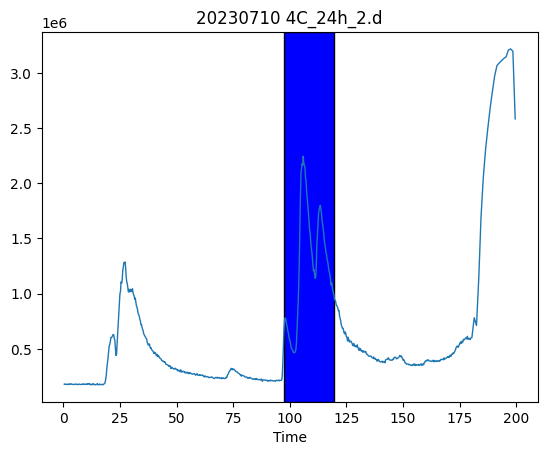

Specified BAF has 738 spectra with line and profile data.


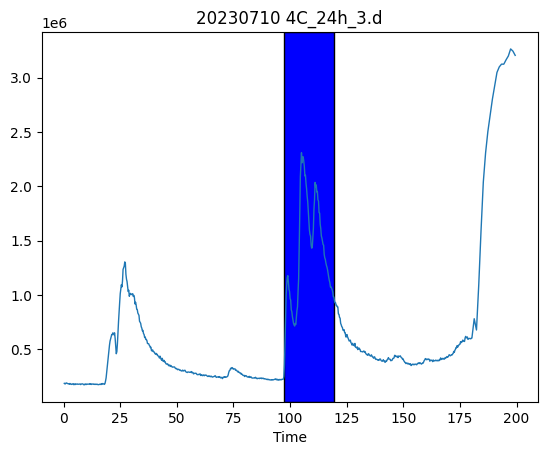

Specified BAF has 738 spectra with line and profile data.


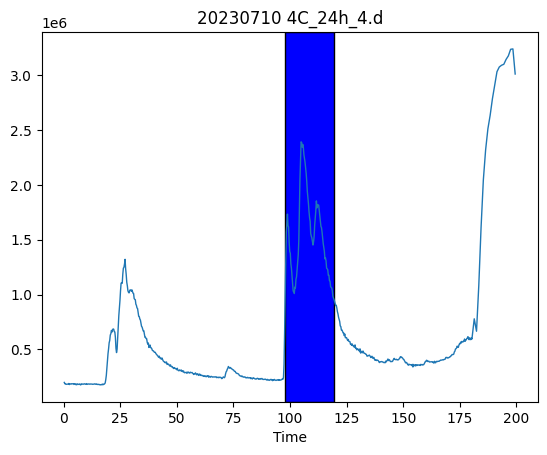

Specified BAF has 738 spectra with line and profile data.


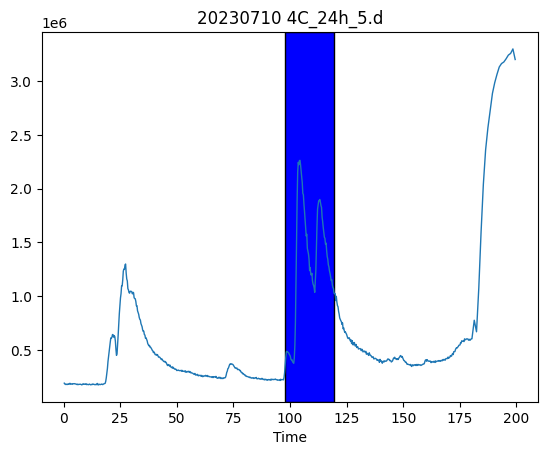

In [5]:
spectra_names = [x for x in os.listdir(directory) if x[-2:] == ".d"]

spectra = []
for s in spectra_names:
    path = os.path.join(directory, s)
    spectrum = BafSpectrum()
    spectrum.export_scans_from_file(path, scanstart = scans[0], scanend = scans[1])
#     spectrum.plot_tic(show_scans=True)
    spectra.append(spectrum)

In [6]:
hdf5_name = os.path.split(directory)[1]+".hdf5"

hdf5_path = os.path.join(directory, hdf5_name)
eng= MetaUniDec()
eng.data.new_file(hdf5_path)


UniDec Engine v.6.0.4

UniDec Path: C:\Users\cm19ljc\Anaconda3\envs\unidec3\lib\site-packages\unidec\bin\unidec.exe


In [7]:
for s in spectra:
    
    eng.data.add_data(s.data2, name=s.name, export=False)
eng.data.export_hdf5()

Adding: 20230710 4C_24h_1.d to ms_dataset
Adding: 20230710 4C_24h_2.d to ms_dataset
Adding: 20230710 4C_24h_3.d to ms_dataset
Adding: 20230710 4C_24h_4.d to ms_dataset
Adding: 20230710 4C_24h_5.d to ms_dataset


In [8]:
len(spectra)

5

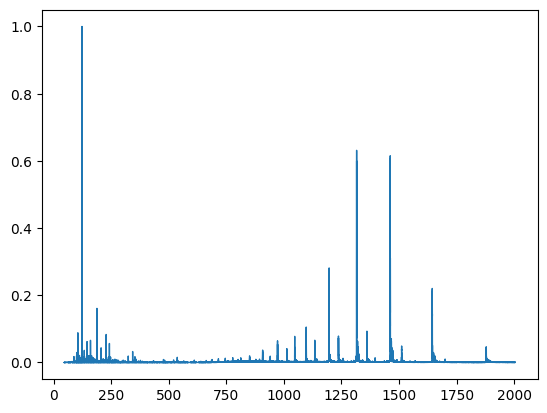

In [9]:
plt.plot(eng.data.spectra[0].data2[:,0], eng.data.spectra[0].data2[:,1])

In [10]:
# Parameters
# UniDec
eng.config.minmz=750
eng.config.numit = 100
eng.config.zzsig = 1
eng.config.psig = 1
eng.config.beta = 1
eng.config.startz = 1
eng.config.endz = 100
eng.config.numz = 100
eng.config.mzsig = 0.85
eng.config.automzsig = 0
eng.config.psfun = 0
eng.config.psfunz = 0
eng.config.autopsfun = 0
eng.config.massub = 17000
eng.config.masslb = 12000
eng.config.msig = 0
eng.config.molig = 0
eng.config.massbins = 1
eng.config.adductmass = 1.007276467
eng.config.baselineflag = 1
eng.config.aggressiveflag = 0
eng.config.noiseflag = 0
eng.config.isotopemode = 0
eng.config.orbimode = 0

# Other
eng.config.mtabsig = 0
eng.config.poolflag = 2
eng.config.nativezub = 1000
eng.config.nativezlb = -1000
eng.config.inflate = 1
eng.config.linflag = 2
eng.config.integratelb = ""
eng.config.integrateub = ""
eng.config.filterwidth = 20
eng.config.zerolog = -12

eng.config.datanorm = 1
eng.config.subbuff=100
eng.config.subtype=2

# peak picking
eng.config.peakwindow = 10
eng.config.peaknorm = 0
eng.config.peakplotthresh = 0.1 
eng.config.peakthresh = 0.01


eng.config.datanorm = 0
eng.config.exnorm = 0
eng.config.write_hdf5()

In [11]:
eng.config.__dict__

{'version': '6.0.4',
 'inputversion': None,
 'dtype': numpy.float32,
 'system': 'Windows',
 'infname': 'input.dat',
 'outfname': '',
 'mfile': 'mass.dat',
 'manualfile': 'man.dat',
 'smashfile': 'smash.dat',
 'confname': 'conf.dat',
 'hdf_file': 'default.hdf5',
 'ofile': 'ofile.dat',
 'matchfile': 'match.csv',
 'peaksfile': 'peaks.dat',
 'dirname': '',
 'udir': '',
 'filename': '',
 'extension': '',
 'deconfile': '',
 'errorfile': '',
 'fitdatfile': '',
 'massgridfile': '',
 'massdatfile': '',
 'cdrawextracts': '',
 'mzgridfile': '',
 'cdcreaderpath': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin\\CDCreader.exe',
 'UniDecPath': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin\\unidec.exe',
 'UniDecDir': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin',
 'UniDecName': 'unidec.exe',
 'defaultUnidecDir': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin',
 'opencomman

In [12]:
eng.open(hdf5_path)
eng.process_data()

eng.run_unidec()


Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)
Opening Time: 0.5461851999999965
Execution Time: 0.8294536000000008
Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)
Execution Time: 188.6125058
Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)


(5100,)
(20, 255)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


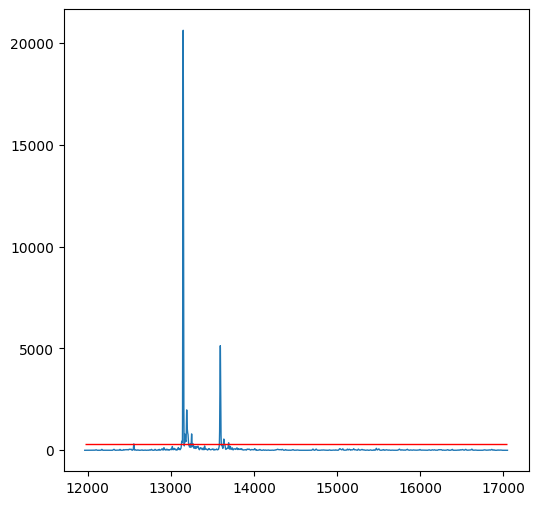

(5100,)
(20, 255)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


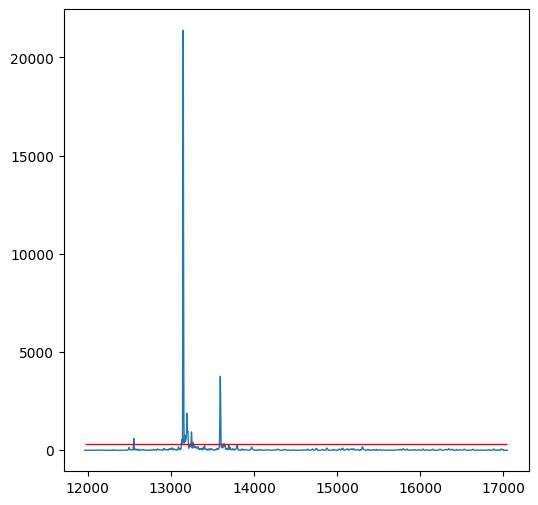

(5100,)
(20, 255)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


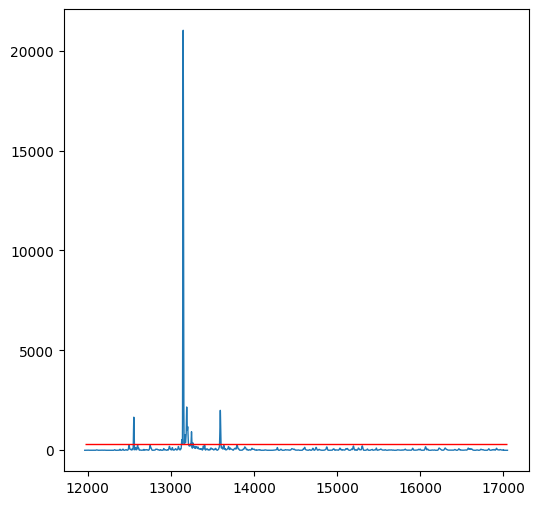

(5100,)
(20, 255)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


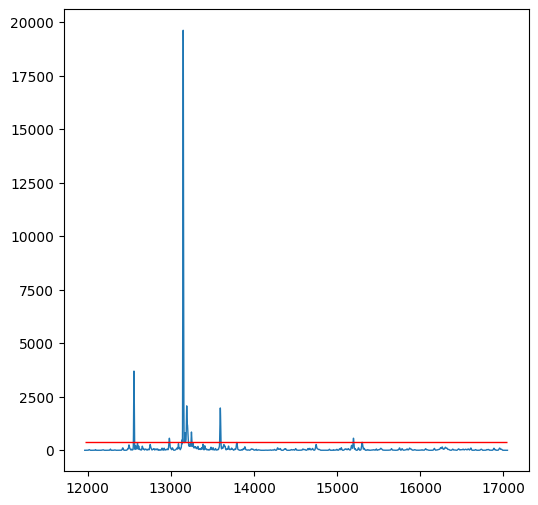

(5100,)
(20, 255)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


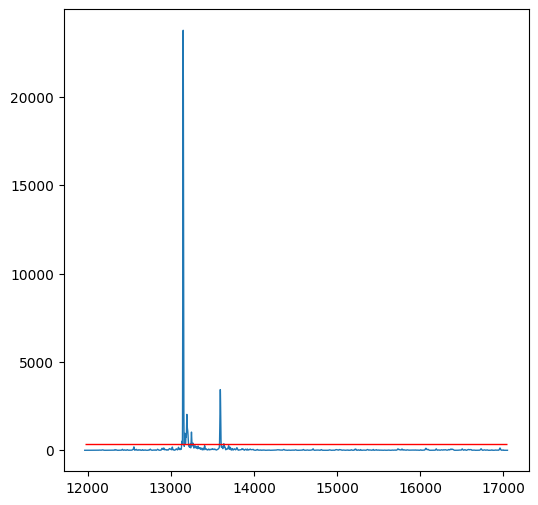

In [30]:
# add in deconvolved spectra background subtraction
# use datacompsub - taken from mass assign paper 
# add additional smoothing step? 
deconsubtype = 2
deconsmooth = 0
deconsubbuff = 1

binsize = 20


for s in eng.data.spectra:
    
#     plt.plot(s.massdat[:,0],s.massdat[:,1],)
    new_size= (s.massdat[:,1].flatten().shape[0]//binsize+1)*binsize
    resamp= np.resize(s.massdat[:,1],new_size)
    print(resamp.shape)
    resamp=resamp.reshape((binsize,-1))
#     print(np.mean(np.max(resamp,axis=0)))
    print(resamp.shape)
#     print(np.max(resamp,axis=0).shape)
    fig, ax = plt.subplots(1, 1, figsize = (6, 6))
#     s.massdat2 = ud.datacompsub(s.massdat, deconsubbuff)
#     s.massdat3 = ud.datasimpsub(s.massdat,deconsubbuff)
#     s.massdat4=s.massdat
#     s.massdat4[:,1]= s.massdat[:, 1] - np.amin(s.massdat[:, 1])
    s.massdat5=s.massdat
    
    peak_thresh = np.mean(np.median(np.max(resamp,axis=0)))
#     s.massdat5 = ud.remove_noise(s.massdat, 30)
    
#     plt.xlim([13000, 14000])
    ax.plot(s.massdat[:,0],s.massdat[:,1],)
    ax.hlines(peak_thresh, np.min(s.massdat[:,0]),np.max(s.massdat[:,0]), color='red')
#     ax[1].violinplot(s.massdat[:,1])
#     ax[1].plot(s.massdat2[:,0], s.massdat2[:,1])
#     ax[1].plot(s.massdat5[:,0], s.massdat5[:,1])
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    plt.show()

In [14]:
eng.config.peakthresh = 0.05

eng.pick_peaks()

Execution Time: 0.4345123999999885
Peak info saved to: D:\WORK\20230710 DOE_CTB H6_5M_DAmp\testing\UniDec_Figures_and_Files\testing_extracts.txt


In [15]:
# eng.config.beta

20230710 4C_24h_1.d


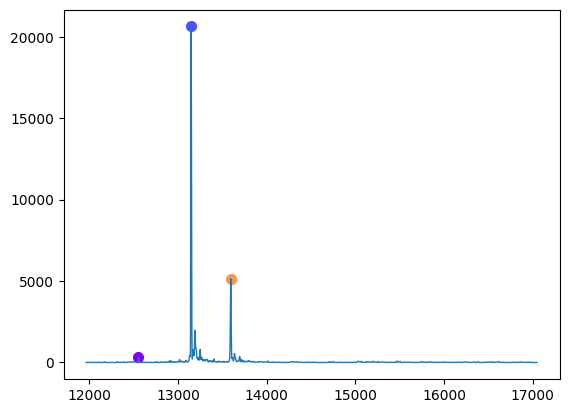

20230710 4C_24h_2.d


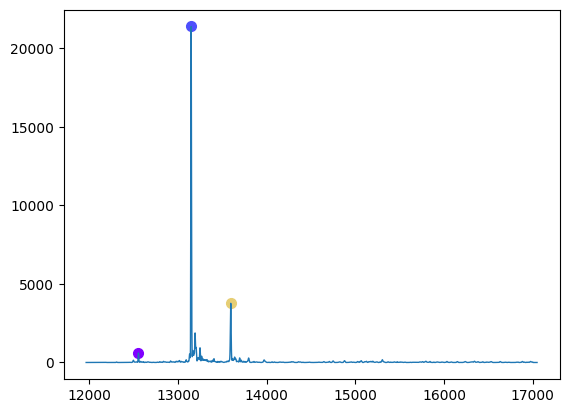

20230710 4C_24h_3.d


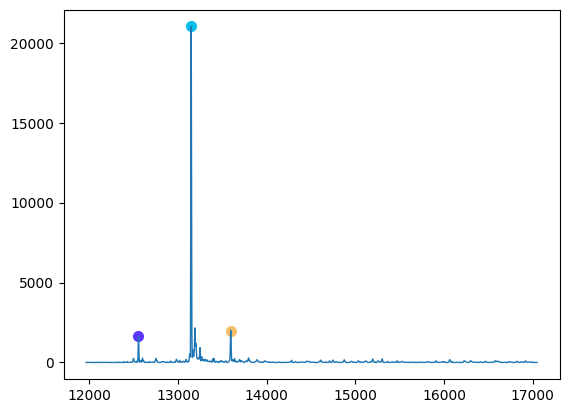

20230710 4C_24h_4.d


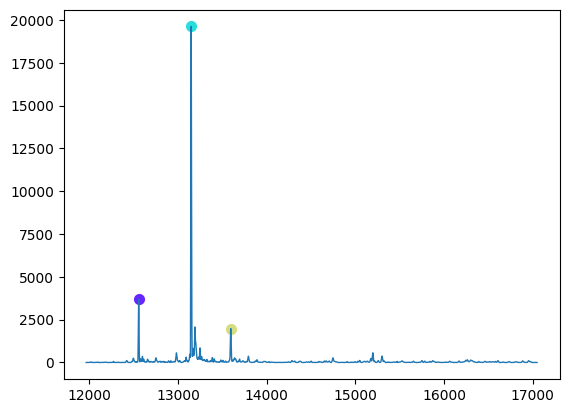

20230710 4C_24h_5.d


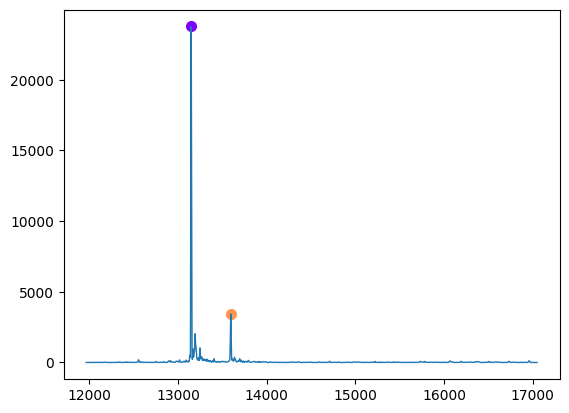

In [16]:
for s in eng.data.spectra:
    print(s.name)
    
    # match peaks to oligos
    match(s.pks.peaks, masslist, names, tolerance)
    
    
    
    plt.plot(s.massdat[:,0],s.massdat[:,1],)
    for p in s.pks.peaks:
#         plt.scatter(p.mass, p.height)
        if p.label != "" and p.height > peak_thresh:
            
            plt.scatter(p.mass, p.height, color = p.color)
    plt.show()
    
# dct = {"Label":label, "Mass":mass, "Height":height, "Name":s_name}    

In [17]:
peak_thresh

145.37273

In [18]:
dfs = []
for s in eng.data.spectra:
    counter = 0
    label = []
    mass = []
    height = []
    for p in s.pks.peaks:
    
        if p.label !="" and p.height>peak_thresh:
            print(p.height, peak_thresh)
            label.append(p.label)
            mass.append(p.mass)
            height.append(p.height)
            counter = counter+1
    s_name = [s.name]*counter

    dct = {"Label":label, "Mass":mass, "Height":height, "Name":s_name}
    df = pd.DataFrame(dct)
    df['Percentage_Labelling'] = (df.Height/df.Height.sum())*100
    dfs.append(df)
results_df = pd.concat(dfs)

314.1284 145.37273
20630.166 145.37273
5135.523 145.37273
598.6719 145.37273
21378.205 145.37273
3764.7 145.37273
1655.6537 145.37273
21021.334 145.37273
1997.7776 145.37273
3699.0579 145.37273
19617.365 145.37273
1975.9148 145.37273
23765.568 145.37273
3434.086 145.37273


In [19]:
results_df

,Label,Mass,Height,Name,Percentage_Labelling
0,CTB-LPET,12555.0,314.128387,20230710 4C_24h_1.d,1.204488
1,CTB-LPETGVSEYG,13149.0,20630.166016,20230710 4C_24h_1.d,79.103943
2,CTB-H6,13595.0,5135.522949,20230710 4C_24h_1.d,19.691559
0,CTB-LPET,12555.0,598.671875,20230710 4C_24h_2.d,2.325700
1,CTB-LPETGVSEYG,13149.0,21378.205078,20230710 4C_24h_2.d,83.049324
2,CTB-H6,13595.0,3764.699951,20230710 4C_24h_2.d,14.624979
0,CTB-LPET,12555.0,1655.653687,20230710 4C_24h_3.d,6.709907
1,CTB-LPETGVSEYG,13149.0,21021.333984,20230710 4C_24h_3.d,85.193649
2,CTB-H6,13595.0,1997.777588,20230710 4C_24h_3.d,8.096440
0,CTB-LPET,12557.0,3699.057861,20230710 4C_24h_4.d,14.625211


In [20]:
results2 = pd.pivot(results_df, index='Name', columns='Label', values = 'Percentage_Labelling').fillna(0)

results2.reset_index(inplace=True)
results2


Label,Name,CTB-H6,CTB-LPET,CTB-LPETGVSEYG
0,20230710 4C_24h_1.d,19.691559,1.204488,79.103943
1,20230710 4C_24h_2.d,14.624979,2.325700,83.049324
2,20230710 4C_24h_3.d,8.096440,6.709907,85.193649
3,20230710 4C_24h_4.d,7.812305,14.625211,77.562485
4,20230710 4C_24h_5.d,12.625477,0.000000,87.374527


In [21]:
# conditions_input_df = pd.read_excel(os.path.join(directory, "Conditions_input.xlsx"))

In [22]:
peak_thresh

145.37273

In [23]:
results2.Name = results2['Name'].str.rstrip('.d')

In [24]:
# results2 = conditions_input_df.merge(results2, how='left', on="Name")

In [25]:
results2

Label,Name,CTB-H6,CTB-LPET,CTB-LPETGVSEYG
0,20230710 4C_24h_1,19.691559,1.204488,79.103943
1,20230710 4C_24h_2,14.624979,2.325700,83.049324
2,20230710 4C_24h_3,8.096440,6.709907,85.193649
3,20230710 4C_24h_4,7.812305,14.625211,77.562485
4,20230710 4C_24h_5,12.625477,0.000000,87.374527


In [26]:
results_name = os.path.split(directory)[1]+"_results.xlsx"
results_path = os.path.join(directory,results_name)
results2.to_excel(results_path)